# Import necessary libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# Loading Dataset

In [2]:
customers = pd.read_csv('../data/Customers.csv')
products = pd.read_csv('../data/Products.csv')
transactions = pd.read_csv('../data/Transactions.csv')

# Convert dates to datetime

In [3]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [4]:
print("Customers Dataset:")
print(customers.info())
print(customers.describe(include='all'))

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%      

In [5]:
print("\nProducts Dataset:")
print(products.info())
print(products.describe(include='all'))


Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN    

In [6]:
print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.describe(include='all'))


Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None
       TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00992      C0109      P059                            NaN   
freq

# Customer sign-up trends

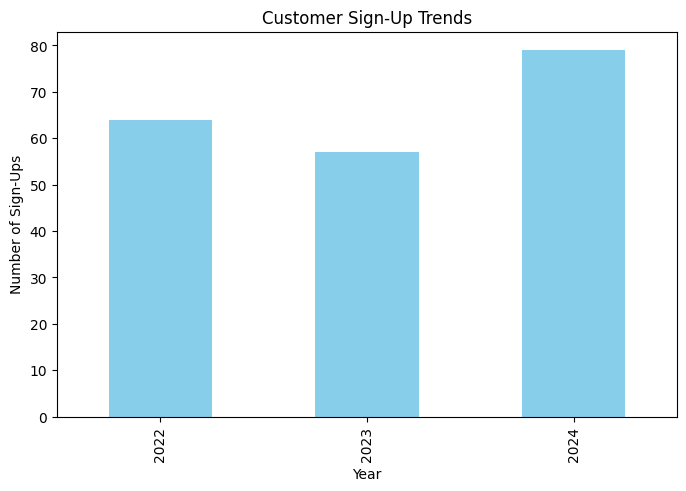

In [7]:

signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 5))
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Customer Sign-Up Trends')
plt.xlabel('Year')
plt.ylabel('Number of Sign-Ups')
plt.savefig('../images/signup_trends.png')
plt.show()

# Product categories distribution

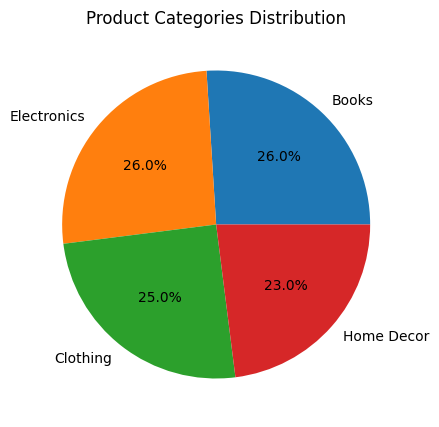

In [8]:

category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
category_counts.plot(kind='pie', autopct='%1.1f%%', title='Product Categories Distribution', ylabel="")
plt.savefig('../images/product_category_distribution.png')
plt.show()

# Transactions Over Time

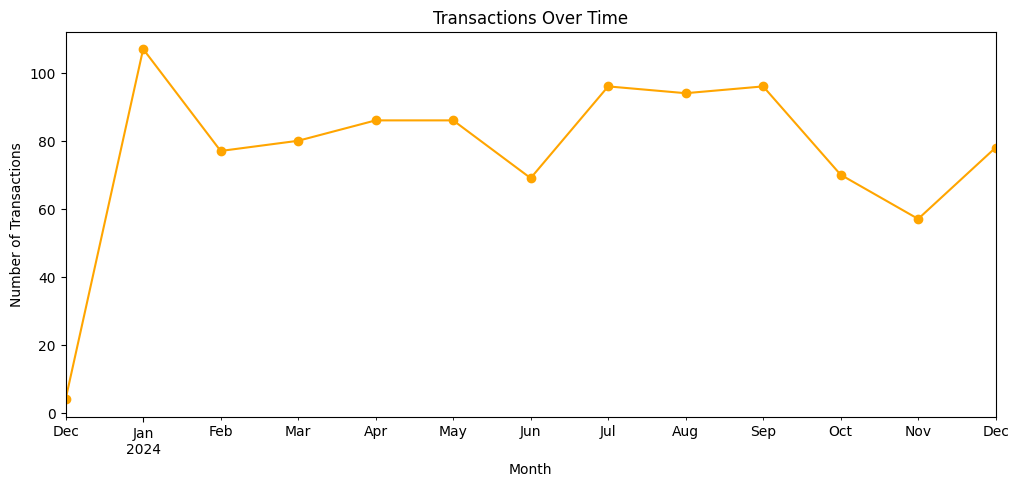

In [9]:
transactions_per_month = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 5))
transactions_per_month.plot(kind='line', marker='o', color='orange')
plt.title('Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.savefig('../images/transactions_over_time.png')
plt.show()

# Revenue by Region

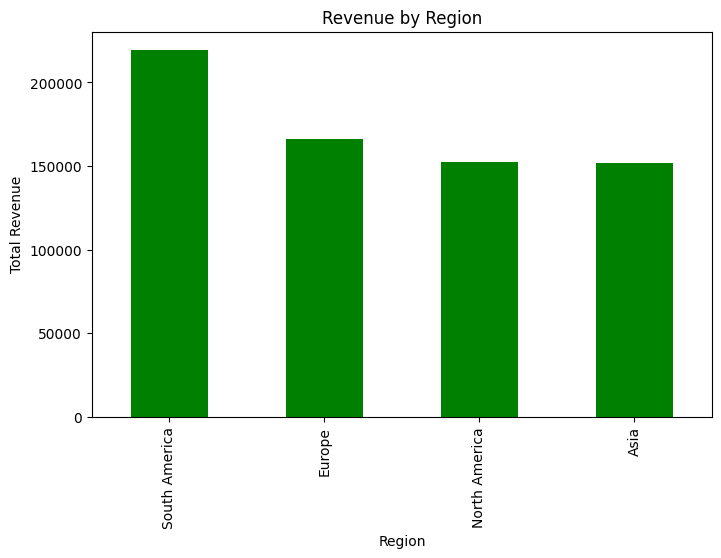

In [10]:

merged = pd.merge(transactions, customers, on='CustomerID')
region_revenue = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='green')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.savefig('../images/revenue_by_region.png')
plt.show()

# Top Products by Revenue

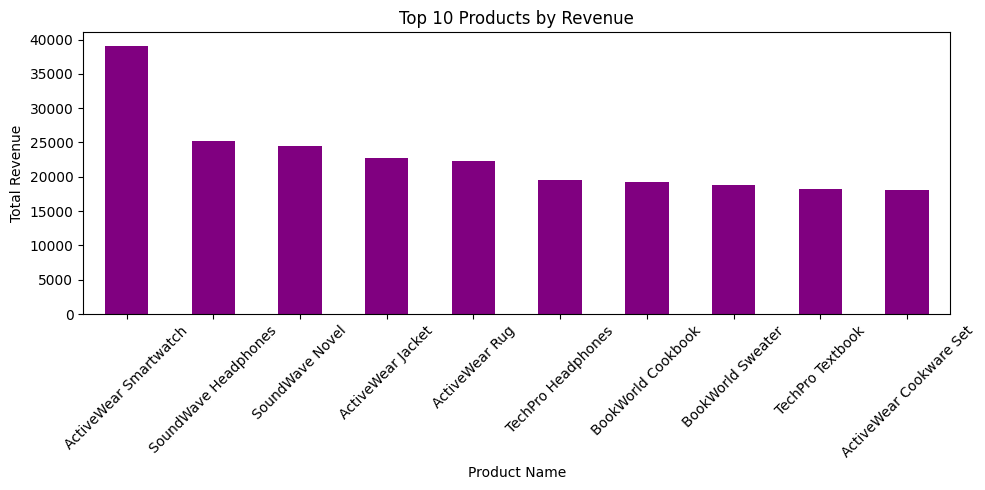

In [11]:

merged_product = pd.merge(transactions, products, on='ProductID')
product_revenue = merged_product.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
product_revenue.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/top_products_by_revenue.png')
plt.show()

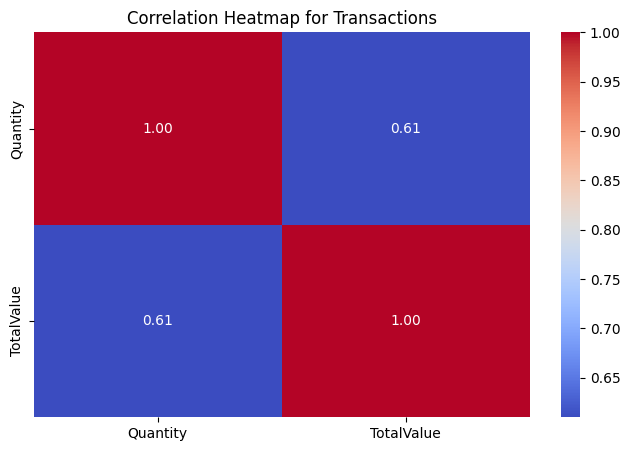

In [12]:
# Correlation heatmap for transactions
plt.figure(figsize=(8, 5))
sns.heatmap(transactions[['Quantity', 'TotalValue']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Transactions')
plt.savefig('../images/correlation_heatmap.png')
plt.show()

In [15]:
from fpdf import FPDF

# Initialize PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Title
pdf.set_font("Arial", style="B", size=16)
pdf.cell(200, 10, txt="Business Insights Report", ln=True, align='C')
pdf.ln(10)  # Add some spacing

# Add insights
pdf.set_font("Arial", size=12)
insights = [
    "1. Customer Sign-Up Trends: The highest number of customer sign-ups occurred in 2024, "
    "with nearly 80 sign-ups. This indicates significant growth compared to 2023, which had the "
    "least sign-ups at around 60.",

    "2. Product Categories Distribution: The product portfolio is well-distributed across categories, "
    "with Electronics and Books each contributing 26%, Clothing 25%, and Home Decor 23%. Electronics "
    "and Books lead slightly.",

    "3. Transactions Over Time: A noticeable drop in transaction volume is observed between May-June "
    "and September-October, suggesting potential seasonality or market dips during these months.",

    "4. Revenue by Region: South America generates the highest revenue at approximately 200,000 USD. "
    "This region appears to be a key contributor to overall revenue.",

    "5. Top Products by Revenue: The top five products contributing the most revenue are Activewear "
    "Smartwatch, Soundwave Headphone, Soundwave Novel, Activewear Jacket, and Activewear Rug, indicating "
    "a strong preference for wearable technology and activewear."
]

for insight in insights:
    pdf.multi_cell(0, 10, insight)
    pdf.ln(2)

# Save PDF
output_path = "Nikhil_Baghe_EDA.pdf"
pdf.output(output_path)
output_path

'Nikhil_Baghe_EDA.pdf'